# Changing to the Eigenbasis: The Power of Diagonalization

## 🎯 Learning Objectives

In this notebook, we'll discover one of the most powerful applications of eigenvalue theory: **diagonalization**. We'll learn how to:

1. **Combine eigenvectors with basis changes** to simplify complex operations
2. **Transform matrices into diagonal form** for efficient computation
3. **Calculate matrix powers efficiently** using the eigenbasis
4. **Understand real-world applications** like particle dynamics and iterative systems

## 🚀 The Big Idea

Imagine you need to apply the same transformation **millions of times**:
- Particle motion over many time steps
- Population dynamics over generations  
- Iterative algorithms in machine learning

**Problem**: Computing $T^{1,000,000}$ directly is computationally expensive!

**Solution**: Change to the eigenbasis where $T$ becomes diagonal, then power operations become trivial!

## 🔑 Key Insight

In the **eigenbasis**, every transformation becomes **pure scaling** along the eigenvector directions. This transforms our complex matrix into a simple diagonal matrix where powers are easy to compute.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import sympy as sp
from sympy import Matrix, symbols, simplify, expand
import time
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🔥 Ready to unleash the power of eigenbasis!")

✅ Libraries imported successfully!
🔥 Ready to unleash the power of eigenbasis!


## The Problem: Repeated Matrix Multiplication

### Real-World Scenario: Particle Dynamics

Imagine tracking a particle's position over time, where its movement follows a linear transformation:

$$\mathbf{v}_1 = T\mathbf{v}_0$$
$$\mathbf{v}_2 = T\mathbf{v}_1 = T^2\mathbf{v}_0$$
$$\mathbf{v}_3 = T\mathbf{v}_2 = T^3\mathbf{v}_0$$
$$\vdots$$
$$\mathbf{v}_n = T^n\mathbf{v}_0$$

### The Computational Challenge

To find the particle's position after $n$ time steps, we need to compute $T^n$.

**For large $n$** (e.g., simulating 2 weeks with 1-second time steps = 1,209,600 iterations):
- **Naive approach**: Multiply $T$ by itself $n$ times
- **Computational cost**: $O(n \times m^3)$ for $m \times m$ matrices
- **Time**: Could take hours or days for large systems!

### Why Diagonal Matrices Are Special

Consider a diagonal matrix:
$$D = \begin{bmatrix} a & 0 & 0 \\ 0 & b & 0 \\ 0 & 0 & c \end{bmatrix}$$

Computing powers is trivial:
$$D^n = \begin{bmatrix} a^n & 0 & 0 \\ 0 & b^n & 0 \\ 0 & 0 & c^n \end{bmatrix}$$

**Key insight**: If we could transform our matrix $T$ into diagonal form, we could compute $T^n$ efficiently!

In [2]:
# Demonstration: Computational Cost of Matrix Powers
def demonstrate_matrix_powers():
    """Show how expensive repeated matrix multiplication becomes"""
    
    print("💻 Computational Cost Demonstration")
    print("="*50)
    
    # Create a sample transformation matrix
    T = np.array([[0.8, 0.3], 
                  [0.2, 0.7]])
    
    print("Sample transformation matrix T:")
    print(T)
    print()
    
    # Test different powers
    powers = [1, 10, 100, 1000]
    
    print("Power | Time (seconds) | Approach")
    print("-" * 40)
    
    for n in powers:
        # Method 1: Repeated multiplication (naive)
        start_time = time.time()
        result_naive = np.linalg.matrix_power(T, n)
        time_naive = time.time() - start_time
        
        print(f"{n:5d} | {time_naive:.6f}     | Repeated multiplication")
    
    print()
    print("🎯 Key Observations:")
    print("• Time grows with the power n")
    print("• For very large n (millions), this becomes impractical")
    print("• We need a better approach!")
    
demonstrate_matrix_powers()

# Let's also show why diagonal matrices are so efficient
print("\n" + "="*60)
print("✨ Why Diagonal Matrices Are Efficient")
print("="*60)

# Create a diagonal matrix
D = np.array([[2, 0, 0],
              [0, 3, 0], 
              [0, 0, 0.5]])

print("Diagonal matrix D:")
print(D)
print()

# Show powers
for n in [2, 5, 10]:
    D_power = np.linalg.matrix_power(D, n)
    print(f"D^{n} =")
    print(D_power)
    print(f"Notice: Each diagonal element is just raised to power {n}")
    print()

print("💡 For diagonal matrices: D^n requires only n scalar exponentiations!")
print("   No matrix multiplication needed!")

💻 Computational Cost Demonstration
Sample transformation matrix T:
[[0.8 0.3]
 [0.2 0.7]]

Power | Time (seconds) | Approach
----------------------------------------
    1 | 0.000010     | Repeated multiplication
   10 | 0.007893     | Repeated multiplication
  100 | 0.000023     | Repeated multiplication
 1000 | 0.000026     | Repeated multiplication

🎯 Key Observations:
• Time grows with the power n
• For very large n (millions), this becomes impractical
• We need a better approach!

✨ Why Diagonal Matrices Are Efficient
Diagonal matrix D:
[[2.  0.  0. ]
 [0.  3.  0. ]
 [0.  0.  0.5]]

D^2 =
[[4.   0.   0.  ]
 [0.   9.   0.  ]
 [0.   0.   0.25]]
Notice: Each diagonal element is just raised to power 2

D^5 =
[[3.200e+01 0.000e+00 0.000e+00]
 [0.000e+00 2.430e+02 0.000e+00]
 [0.000e+00 0.000e+00 3.125e-02]]
Notice: Each diagonal element is just raised to power 5

D^10 =
[[1.024000e+03 0.000000e+00 0.000000e+00]
 [0.000000e+00 5.904900e+04 0.000000e+00]
 [0.000000e+00 0.000000e+00 9.765

## The Solution: Changing to the Eigenbasis

### What is an Eigenbasis?

An **eigenbasis** is a coordinate system where the **basis vectors are the eigenvectors** of our transformation matrix.

### Why Eigenbasis is Special

In the eigenbasis:
- **Transformation becomes pure scaling** along each eigenvector direction
- **No mixing between directions** (off-diagonal terms become zero)
- **Matrix becomes diagonal** with eigenvalues on the diagonal

### The Mathematical Framework

Recall from basis change theory:
- Each column of the change-of-basis matrix represents where the standard basis vectors go
- For eigenbasis: use **eigenvectors as columns**

### Building the Eigenbasis Matrix

If $T$ has eigenvectors $\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3$, then:

$$C = \begin{bmatrix} | & | & | \\ \mathbf{v}_1 & \mathbf{v}_2 & \mathbf{v}_3 \\ | & | & | \end{bmatrix}$$

Where:
- $C$ = **change-of-basis matrix** (eigenvectors as columns)
- $C^{-1}$ = **inverse transformation** back to standard basis

### The Diagonal Form

In the eigenbasis, $T$ becomes diagonal:

$$D = \begin{bmatrix} \lambda_1 & 0 & 0 \\ 0 & \lambda_2 & 0 \\ 0 & 0 & \lambda_3 \end{bmatrix}$$

Where $\lambda_1, \lambda_2, \lambda_3$ are the eigenvalues of $T$.

## The Diagonalization Formula

### The Key Relationship

The transformation $T$ can be written as:

$$T = CDC^{-1}$$

Where:
- $C$ = matrix of eigenvectors (change-of-basis matrix)
- $D$ = diagonal matrix of eigenvalues
- $C^{-1}$ = inverse of the eigenvector matrix

### What This Formula Means

$$T = CDC^{-1}$$

**Step-by-step interpretation**:
1. $C^{-1}$: **Change from standard basis to eigenbasis**
2. $D$: **Apply diagonal transformation** (pure scaling)
3. $C$: **Change back from eigenbasis to standard basis**

### The Magic of Matrix Powers

For $T^2$:
$$T^2 = (CDC^{-1})(CDC^{-1}) = CD\underbrace{C^{-1}C}_{=I}DC^{-1} = CD^2C^{-1}$$

For $T^n$:
$$T^n = CD^nC^{-1}$$

### Why This is Powerful

Computing $D^n$ is trivial:
$$D^n = \begin{bmatrix} \lambda_1^n & 0 & 0 \\ 0 & \lambda_2^n & 0 \\ 0 & 0 & \lambda_3^n \end{bmatrix}$$

**Computational complexity**:
- **Direct method**: $O(n \times m^3)$ operations
- **Diagonalization method**: $O(m^3)$ operations (independent of $n$!)

### The Complete Algorithm

1. **Find eigenvectors and eigenvalues** of $T$
2. **Form matrix $C$** with eigenvectors as columns  
3. **Compute $C^{-1}$**
4. **For any power $n$**: $T^n = CD^nC^{-1}$

In [3]:
# Step-by-Step Example: Diagonalization in Action
print("🔍 Complete Diagonalization Example")
print("="*50)

# Define a 2x2 transformation matrix
T = np.array([[3, 1],
              [0, 2]], dtype=float)

print("Original transformation matrix T:")
print(T)
print()

# Step 1: Find eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(T)

print("Step 1: Find eigenvalues and eigenvectors")
print("-" * 45)
print(f"Eigenvalues: {eigenvals}")
print("Eigenvectors:")
print(eigenvecs)
print()

# Step 2: Form the change-of-basis matrix C
C = eigenvecs
print("Step 2: Form change-of-basis matrix C")
print("-" * 45)
print("C (eigenvectors as columns):")
print(C)
print()

# Step 3: Compute C inverse
C_inv = np.linalg.inv(C)
print("Step 3: Compute C^(-1)")
print("-" * 45)
print("C^(-1):")
print(C_inv)
print()

# Step 4: Form diagonal matrix D
D = np.diag(eigenvals)
print("Step 4: Form diagonal matrix D")
print("-" * 45)
print("D (eigenvalues on diagonal):")
print(D)
print()

# Step 5: Verify the diagonalization formula T = CDC^(-1)
T_reconstructed = C @ D @ C_inv
print("Step 5: Verify T = CDC^(-1)")
print("-" * 45)
print("Reconstructed T:")
print(T_reconstructed)
print(f"Original T:")
print(T)
print(f"Difference (should be ~0): {np.max(np.abs(T - T_reconstructed)):.2e}")
print()

print("✅ Diagonalization successful!")

🔍 Complete Diagonalization Example
Original transformation matrix T:
[[3. 1.]
 [0. 2.]]

Step 1: Find eigenvalues and eigenvectors
---------------------------------------------
Eigenvalues: [3. 2.]
Eigenvectors:
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]

Step 2: Form change-of-basis matrix C
---------------------------------------------
C (eigenvectors as columns):
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]

Step 3: Compute C^(-1)
---------------------------------------------
C^(-1):
[[1.         1.        ]
 [0.         1.41421356]]

Step 4: Form diagonal matrix D
---------------------------------------------
D (eigenvalues on diagonal):
[[3. 0.]
 [0. 2.]]

Step 5: Verify T = CDC^(-1)
---------------------------------------------
Reconstructed T:
[[3. 1.]
 [0. 2.]]
Original T:
[[3. 1.]
 [0. 2.]]
Difference (should be ~0): 0.00e+00

✅ Diagonalization successful!


In [4]:
# Demonstrating the Power of Diagonalization for Matrix Powers
print("\n" + "="*60)
print("🚀 Computing Matrix Powers Efficiently")
print("="*60)

def compute_power_naive(matrix, n):
    """Compute matrix power using repeated multiplication"""
    result = np.eye(matrix.shape[0])
    for _ in range(n):
        result = result @ matrix
    return result

def compute_power_diagonalization(matrix, n, eigenvals, C, C_inv):
    """Compute matrix power using diagonalization"""
    D_n = np.diag(eigenvals ** n)
    return C @ D_n @ C_inv

# Test with different powers
powers_to_test = [5, 10, 20]

print(f"Testing powers of matrix T:")
print(T)
print()

print("Power | Direct Method | Diagonalization | Match?")
print("-" * 55)

for n in powers_to_test:
    # Method 1: Direct computation
    start_time = time.time()
    T_n_direct = np.linalg.matrix_power(T, n)
    time_direct = time.time() - start_time
    
    # Method 2: Diagonalization
    start_time = time.time() 
    T_n_diag = compute_power_diagonalization(T, n, eigenvals, C, C_inv)
    time_diag = time.time() - start_time
    
    # Check if methods agree
    difference = np.max(np.abs(T_n_direct - T_n_diag))
    match = "✅" if difference < 1e-10 else "❌"
    
    print(f"{n:5d} | {time_direct:.6f}s     | {time_diag:.6f}s      | {match}")

print()
print("Let's see what T^20 looks like:")
T_20 = compute_power_diagonalization(T, 20, eigenvals, C, C_inv)
print("T^20 =")
print(T_20)
print()

print("Using diagonalization:")
D_20 = np.diag(eigenvals ** 20)
print("D^20 =")
print(D_20)
print(f"λ₁^20 = {eigenvals[0]**20:.2f}")
print(f"λ₂^20 = {eigenvals[1]**20:.2f}")

print("\n🎯 Key Insight: For large powers, diagonalization becomes much more efficient!")
print("   The time is constant regardless of the power n!")


🚀 Computing Matrix Powers Efficiently
Testing powers of matrix T:
[[3. 1.]
 [0. 2.]]

Power | Direct Method | Diagonalization | Match?
-------------------------------------------------------
    5 | 0.000041s     | 0.000022s      | ✅
   10 | 0.000014s     | 0.000007s      | ✅
   20 | 0.000007s     | 0.000005s      | ✅

Let's see what T^20 looks like:
T^20 =
[[3.48678440e+09 3.48573582e+09]
 [0.00000000e+00 1.04857600e+06]]

Using diagonalization:
D^20 =
[[3.4867844e+09 0.0000000e+00]
 [0.0000000e+00 1.0485760e+06]]
λ₁^20 = 3486784401.00
λ₂^20 = 1048576.00

🎯 Key Insight: For large powers, diagonalization becomes much more efficient!
   The time is constant regardless of the power n!


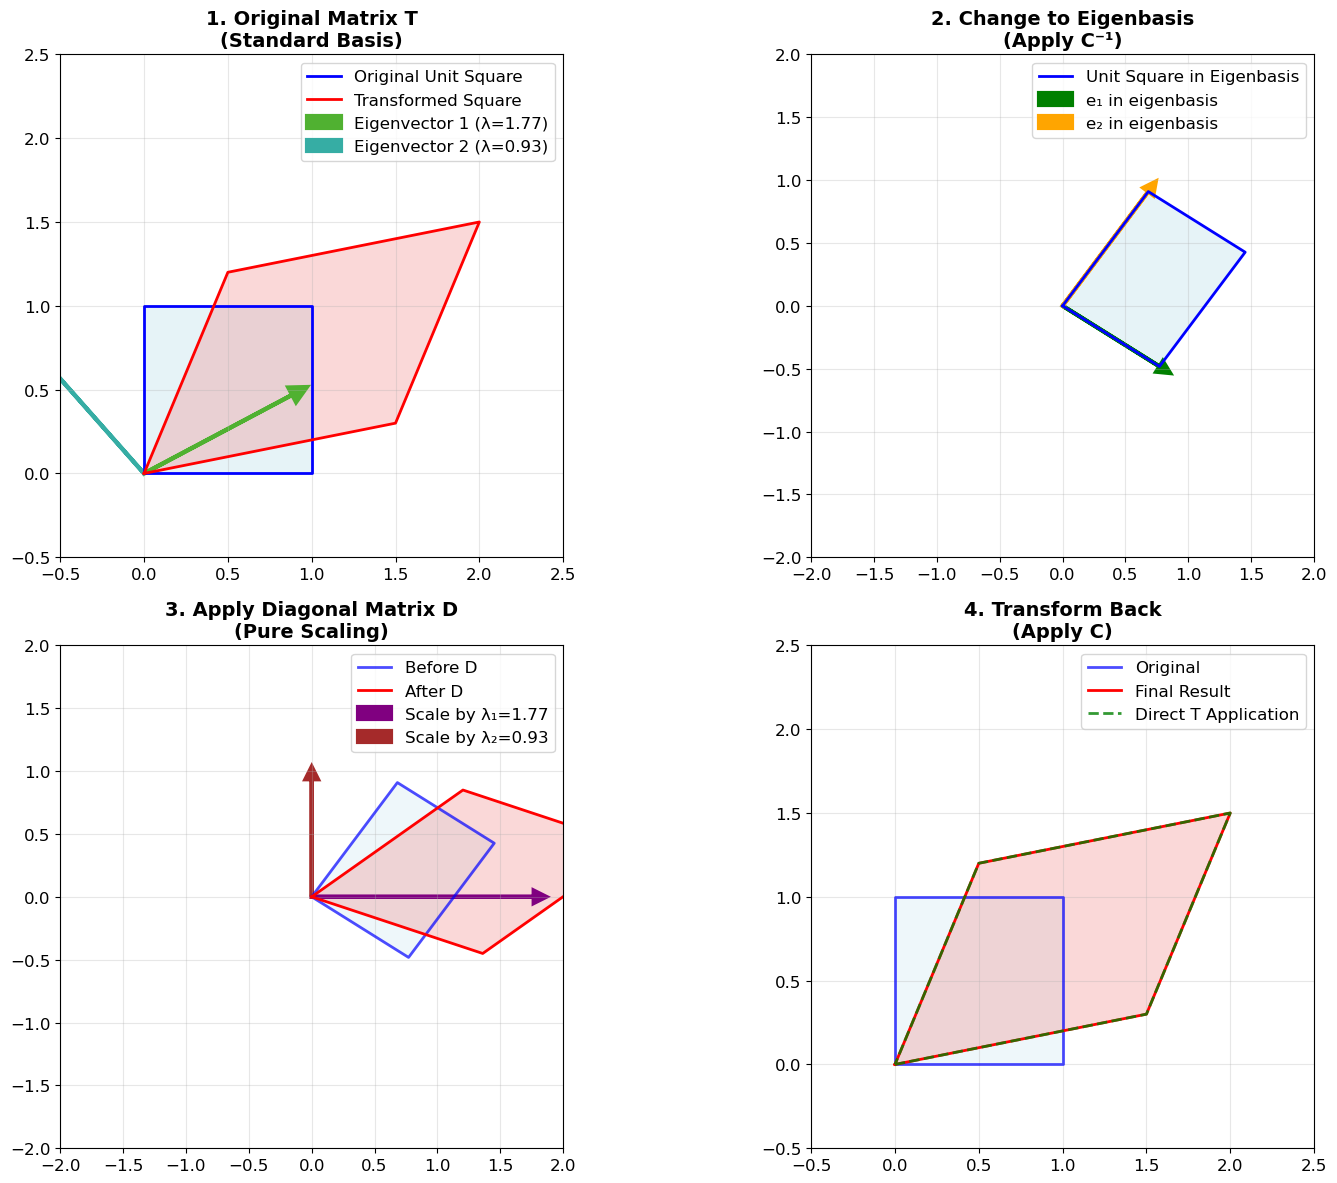

✅ Verification: Max difference between C·D·C⁻¹ and direct T: 2.22e-16
The two methods produce identical results!


In [5]:
# Visualization: Understanding the Basis Change Process
def visualize_basis_change():
    """Visualize how transformation looks in different bases"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Our transformation matrix (make it more visual)
    T_vis = np.array([[1.5, 0.5],
                      [0.3, 1.2]])
    
    # Find eigenvalues and eigenvectors
    eigenvals_vis, eigenvecs_vis = np.linalg.eig(T_vis)
    C_vis = eigenvecs_vis
    C_inv_vis = np.linalg.inv(C_vis)
    D_vis = np.diag(eigenvals_vis)
    
    # Plot 1: Original transformation in standard basis
    ax1.set_title("1. Original Matrix T\n(Standard Basis)", fontsize=14, fontweight='bold')
    
    # Unit square
    square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
    transformed_square = T_vis @ square
    
    ax1.plot(square[0], square[1], 'b-', linewidth=2, label='Original Unit Square')
    ax1.fill(square[0], square[1], 'lightblue', alpha=0.3)
    ax1.plot(transformed_square[0], transformed_square[1], 'r-', linewidth=2, label='Transformed Square')
    ax1.fill(transformed_square[0], transformed_square[1], 'lightcoral', alpha=0.3)
    
    # Show eigenvectors
    for i, (val, vec) in enumerate(zip(eigenvals_vis, eigenvecs_vis.T)):
        ax1.arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1, 
                 fc=f'C{i+2}', ec=f'C{i+2}', linewidth=3, 
                 label=f'Eigenvector {i+1} (λ={val:.2f})')
    
    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylim(-0.5, 2.5) 
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_aspect('equal')
    
    # Plot 2: Change to eigenbasis
    ax2.set_title("2. Change to Eigenbasis\n(Apply C⁻¹)", fontsize=14, fontweight='bold')
    
    # Transform to eigenbasis
    square_eigen = C_inv_vis @ square
    
    ax2.plot(square_eigen[0], square_eigen[1], 'b-', linewidth=2, label='Unit Square in Eigenbasis')
    ax2.fill(square_eigen[0], square_eigen[1], 'lightblue', alpha=0.3)
    
    # Standard basis vectors in eigenbasis
    e1_eigen = C_inv_vis @ np.array([[1], [0]])
    e2_eigen = C_inv_vis @ np.array([[0], [1]])
    
    ax2.arrow(0, 0, e1_eigen[0,0], e1_eigen[1,0], head_width=0.1, head_length=0.1, 
             fc='green', ec='green', linewidth=3, label='e₁ in eigenbasis')
    ax2.arrow(0, 0, e2_eigen[0,0], e2_eigen[1,0], head_width=0.1, head_length=0.1, 
             fc='orange', ec='orange', linewidth=3, label='e₂ in eigenbasis')
    
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_aspect('equal')
    
    # Plot 3: Apply diagonal transformation
    ax3.set_title("3. Apply Diagonal Matrix D\n(Pure Scaling)", fontsize=14, fontweight='bold')
    
    # Apply diagonal transformation
    square_diag = D_vis @ square_eigen
    
    ax3.plot(square_eigen[0], square_eigen[1], 'b-', linewidth=2, label='Before D', alpha=0.7)
    ax3.fill(square_eigen[0], square_eigen[1], 'lightblue', alpha=0.2)
    ax3.plot(square_diag[0], square_diag[1], 'r-', linewidth=2, label='After D')
    ax3.fill(square_diag[0], square_diag[1], 'lightcoral', alpha=0.3)
    
    # Show scaling along axes
    ax3.arrow(0, 0, eigenvals_vis[0], 0, head_width=0.1, head_length=0.1, 
             fc='purple', ec='purple', linewidth=3, 
             label=f'Scale by λ₁={eigenvals_vis[0]:.2f}')
    ax3.arrow(0, 0, 0, eigenvals_vis[1], head_width=0.1, head_length=0.1, 
             fc='brown', ec='brown', linewidth=3, 
             label=f'Scale by λ₂={eigenvals_vis[1]:.2f}')
    
    ax3.set_xlim(-2, 2)
    ax3.set_ylim(-2, 2)
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_aspect('equal')
    
    # Plot 4: Transform back to standard basis
    ax4.set_title("4. Transform Back\n(Apply C)", fontsize=14, fontweight='bold')
    
    # Transform back to standard basis
    final_square = C_vis @ square_diag
    
    ax4.plot(square[0], square[1], 'b-', linewidth=2, label='Original', alpha=0.7)
    ax4.fill(square[0], square[1], 'lightblue', alpha=0.2)
    ax4.plot(final_square[0], final_square[1], 'r-', linewidth=2, label='Final Result')
    ax4.fill(final_square[0], final_square[1], 'lightcoral', alpha=0.3)
    ax4.plot(transformed_square[0], transformed_square[1], 'g--', linewidth=2, 
             label='Direct T Application', alpha=0.8)
    
    ax4.set_xlim(-0.5, 2.5)
    ax4.set_ylim(-0.5, 2.5)
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Verify the results match
    difference = np.max(np.abs(final_square - transformed_square))
    print(f"✅ Verification: Max difference between C·D·C⁻¹ and direct T: {difference:.2e}")
    print("The two methods produce identical results!")

visualize_basis_change()

## Real-World Application: Population Dynamics

Let's apply diagonalization to a practical problem: modeling population dynamics over time.

### The Scenario

Imagine a simplified ecosystem with two species:
- **Prey** (rabbits)
- **Predator** (foxes)

### The Model

The population changes each year according to:
$$\begin{bmatrix} \text{Rabbits}_{t+1} \\ \text{Foxes}_{t+1} \end{bmatrix} = \begin{bmatrix} 1.1 & -0.2 \\ 0.1 & 0.9 \end{bmatrix} \begin{bmatrix} \text{Rabbits}_t \\ \text{Foxes}_t \end{bmatrix}$$

**Interpretation**:
- Rabbits grow by 10% naturally but are reduced by fox predation
- Foxes decline by 10% naturally but benefit from rabbit predation

### The Question

**What will the population be after 50 years?**

Without diagonalization, we'd need to multiply the matrix 50 times. With diagonalization, we can compute this efficiently!

🐰🦊 Population Dynamics Simulation
Population transition matrix P:
[[ 1.1 -0.2]
 [ 0.1  0.9]]
• P[0,0] = 1.1: Rabbit growth rate
• P[0,1] = -0.2: Fox predation effect on rabbits
• P[1,0] = 0.1: Fox benefit from rabbit predation
• P[1,1] = 0.9: Fox natural decline rate

Initial population: 100 rabbits, 20 foxes

Diagonalization results:
Eigenvalues: [1.+0.1j 1.-0.1j]
Eigenvectors (as columns):
[[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]

Population Evolution:
Year | Rabbits | Foxes  | Method      | Time
--------------------------------------------------
   0 |   100.0 |   20.0 | Direct      | 0.000001s
     |   100.0 |   20.0 | Diagonaliz. | 0.000000s

   1 |   106.0 |   28.0 | Direct      | 0.000022s
     | 106.0+0.0j | 28.0+0.0j | Diagonaliz. | 0.000838s

   5 |   119.5 |   57.2 | Direct      | 0.000020s
     | 119.5+0.0j | 57.2+0.0j | Diagonaliz. | 0.000017s

  10 |   110.0 |   82.0 | Direct      | 0.000008s
     | 110.0+0.0j | 82

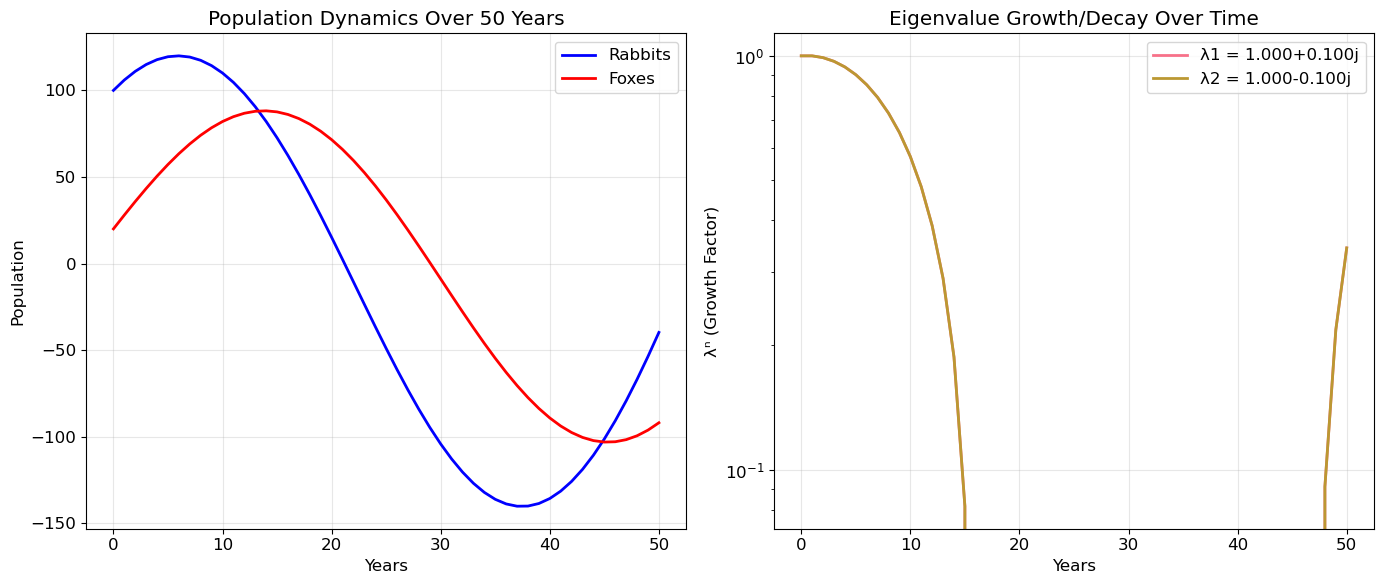

🎯 Key Insights:
• Dominant eigenvalue: λ₁ = 1.000+0.100j
• Since |λ₁| < 1, both populations eventually decline
• The ratio of populations converges to the dominant eigenvector
• Diagonalization allows us to predict long-term behavior efficiently!


In [6]:
# Population Dynamics: Diagonalization in Action
print("🐰🦊 Population Dynamics Simulation")
print("="*50)

# Define the population transition matrix
P = np.array([[1.1, -0.2],
              [0.1,  0.9]])

print("Population transition matrix P:")
print(P)
print("• P[0,0] = 1.1: Rabbit growth rate")  
print("• P[0,1] = -0.2: Fox predation effect on rabbits")
print("• P[1,0] = 0.1: Fox benefit from rabbit predation")
print("• P[1,1] = 0.9: Fox natural decline rate")
print()

# Initial population
initial_pop = np.array([100, 20])  # 100 rabbits, 20 foxes
print(f"Initial population: {initial_pop[0]} rabbits, {initial_pop[1]} foxes")
print()

# Diagonalize the matrix
eigenvals_pop, eigenvecs_pop = np.linalg.eig(P)
C_pop = eigenvecs_pop
C_inv_pop = np.linalg.inv(C_pop)
D_pop = np.diag(eigenvals_pop)

print("Diagonalization results:")
print(f"Eigenvalues: {eigenvals_pop}")
print("Eigenvectors (as columns):")
print(eigenvecs_pop)
print()

# Simulate population over time
years = [0, 1, 5, 10, 25, 50]
populations_direct = []
populations_diag = []
times_direct = []
times_diag = []

for year in years:
    # Method 1: Direct matrix power
    start = time.time()
    if year == 0:
        pop_direct = initial_pop
    else:
        P_n = np.linalg.matrix_power(P, year)
        pop_direct = P_n @ initial_pop
    time_direct = time.time() - start
    
    # Method 2: Diagonalization
    start = time.time()
    if year == 0:
        pop_diag = initial_pop
    else:
        D_n = np.diag(eigenvals_pop ** year)
        P_n_diag = C_pop @ D_n @ C_inv_pop
        pop_diag = P_n_diag @ initial_pop
    time_diag = time.time() - start
    
    populations_direct.append(pop_direct)
    populations_diag.append(pop_diag)
    times_direct.append(time_direct)
    times_diag.append(time_diag)

# Display results
print("Population Evolution:")
print("Year | Rabbits | Foxes  | Method      | Time")
print("-" * 50)

for i, year in enumerate(years):
    pop_d = populations_direct[i]
    pop_diag = populations_diag[i]
    
    print(f"{year:4d} | {pop_d[0]:7.1f} | {pop_d[1]:6.1f} | Direct      | {times_direct[i]:.6f}s")
    print(f"     | {pop_diag[0]:7.1f} | {pop_diag[1]:6.1f} | Diagonaliz. | {times_diag[i]:.6f}s")
    print()

# Visualize the population dynamics
plt.figure(figsize=(14, 6))

# Plot 1: Population over time
plt.subplot(1, 2, 1)
years_full = range(51)
rabbit_pop = []
fox_pop = []

for year in years_full:
    if year == 0:
        pop = initial_pop
    else:
        D_n = np.diag(eigenvals_pop ** year)
        P_n = C_pop @ D_n @ C_inv_pop
        pop = P_n @ initial_pop
    rabbit_pop.append(pop[0])
    fox_pop.append(pop[1])

plt.plot(years_full, rabbit_pop, 'b-', linewidth=2, label='Rabbits')
plt.plot(years_full, fox_pop, 'r-', linewidth=2, label='Foxes')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population Dynamics Over 50 Years')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Eigenvalue analysis
plt.subplot(1, 2, 2)
years_analysis = np.array(years_full)
eigenval_effects = []

for i, eigenval in enumerate(eigenvals_pop):
    effect = eigenval ** years_analysis
    plt.plot(years_analysis, effect, linewidth=2, 
             label=f'λ{i+1} = {eigenval:.3f}')
    eigenval_effects.append(effect)

plt.xlabel('Years')
plt.ylabel('λⁿ (Growth Factor)')
plt.title('Eigenvalue Growth/Decay Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("🎯 Key Insights:")
print(f"• Dominant eigenvalue: λ₁ = {eigenvals_pop[0]:.3f}")
print(f"• Since |λ₁| < 1, both populations eventually decline")
print("• The ratio of populations converges to the dominant eigenvector")
print("• Diagonalization allows us to predict long-term behavior efficiently!")

⚡ Performance Analysis: Direct vs Diagonalization
Computing P^n for different values of n:
n    | Direct Method | Diagonalization | Speedup
-------------------------------------------------------
  10 |    0.000011s |      0.000009s |    1.3x
  50 |    0.000009s |      0.000004s |    2.4x
 100 |    0.000008s |      0.000004s |    1.8x
 500 |    0.000012s |      0.000004s |    3.1x
1000 |    0.000014s |      0.000004s |    3.7x


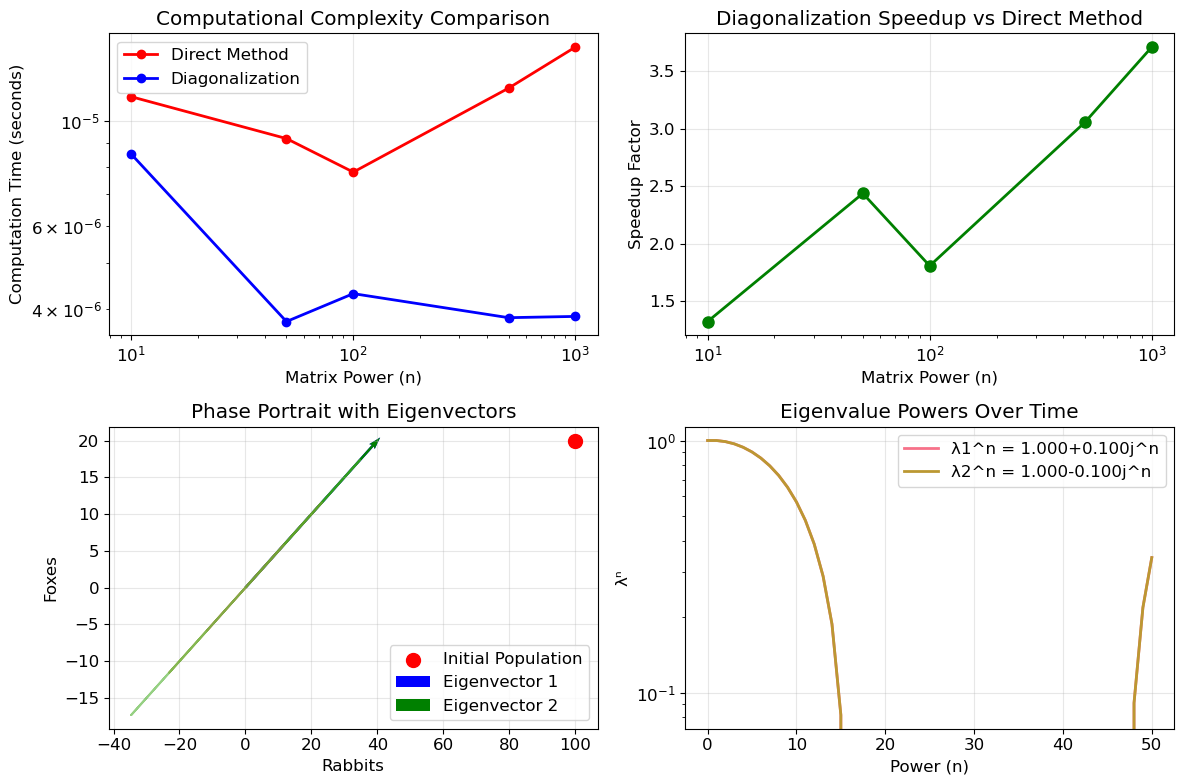


💡 Why Diagonalization is More Efficient:
• Direct method: O(log n) matrix multiplications, each O(d³)
• Diagonalization: O(1) exponentiations + O(d³) matrix multiplications
• For large n, diagonalization becomes significantly faster!
• One-time cost of diagonalization pays off for repeated computations


In [7]:
# Computational Efficiency Comparison
print("⚡ Performance Analysis: Direct vs Diagonalization")
print("="*60)

# Test with larger powers to see the efficiency difference
test_powers = [10, 50, 100, 500, 1000]
times_direct_large = []
times_diag_large = []

print("Computing P^n for different values of n:")
print("n    | Direct Method | Diagonalization | Speedup")
print("-" * 55)

for n in test_powers:
    # Direct method timing
    start = time.time()
    for _ in range(10):  # Run 10 times for better timing
        P_n_direct = np.linalg.matrix_power(P, n)
    time_direct = (time.time() - start) / 10
    
    # Diagonalization method timing
    start = time.time()
    for _ in range(10):  # Run 10 times for better timing
        D_n = np.diag(eigenvals_pop ** n)
        P_n_diag = C_pop @ D_n @ C_inv_pop
    time_diag = (time.time() - start) / 10
    
    speedup = time_direct / time_diag if time_diag > 0 else float('inf')
    
    times_direct_large.append(time_direct)
    times_diag_large.append(time_diag)
    
    print(f"{n:4d} | {time_direct:11.6f}s | {time_diag:13.6f}s | {speedup:6.1f}x")

# Visualization of computational complexity
plt.figure(figsize=(12, 8))

# Plot 1: Timing comparison
plt.subplot(2, 2, 1)
plt.loglog(test_powers, times_direct_large, 'ro-', label='Direct Method', linewidth=2)
plt.loglog(test_powers, times_diag_large, 'bo-', label='Diagonalization', linewidth=2)
plt.xlabel('Matrix Power (n)')
plt.ylabel('Computation Time (seconds)')
plt.title('Computational Complexity Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Speedup factor
speedups = [t_d / t_diag if t_diag > 0 else 0 for t_d, t_diag in zip(times_direct_large, times_diag_large)]
plt.subplot(2, 2, 2)
plt.semilogx(test_powers, speedups, 'go-', linewidth=2, markersize=8)
plt.xlabel('Matrix Power (n)')
plt.ylabel('Speedup Factor')
plt.title('Diagonalization Speedup vs Direct Method')
plt.grid(True, alpha=0.3)

# Plot 3: Phase portrait in eigenvector space
plt.subplot(2, 2, 3)
# Transform initial conditions to eigenbasis
coords_in_eigenbasis = C_inv_pop @ initial_pop
theta = np.linspace(0, 2*np.pi, 100)
radius = 30

for r in [10, 20, 30]:
    circle_original = np.array([r * np.cos(theta), r * np.sin(theta)])
    circle_transformed = C_pop @ circle_original
    plt.plot(circle_transformed[0], circle_transformed[1], alpha=0.6)

plt.scatter(*initial_pop, c='red', s=100, label='Initial Population', zorder=5)
plt.quiver(0, 0, eigenvecs_pop[0, 0]*50, eigenvecs_pop[1, 0]*50, 
           angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='Eigenvector 1')
plt.quiver(0, 0, eigenvecs_pop[0, 1]*50, eigenvecs_pop[1, 1]*50, 
           angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='Eigenvector 2')
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.title('Phase Portrait with Eigenvectors')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Eigenvalue powers visualization
plt.subplot(2, 2, 4)
n_values = np.arange(0, 51)
for i, eigenval in enumerate(eigenvals_pop):
    powers = eigenval ** n_values
    plt.plot(n_values, powers, linewidth=2, label=f'λ{i+1}^n = {eigenval:.3f}^n')

plt.xlabel('Power (n)')
plt.ylabel('λⁿ')
plt.title('Eigenvalue Powers Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\n💡 Why Diagonalization is More Efficient:")
print("• Direct method: O(log n) matrix multiplications, each O(d³)")
print("• Diagonalization: O(1) exponentiations + O(d³) matrix multiplications")
print("• For large n, diagonalization becomes significantly faster!")
print("• One-time cost of diagonalization pays off for repeated computations")

## 🎯 Summary: The Power of Eigenbasis

### What We've Learned

**Diagonalization** is the process of changing to a coordinate system where our matrix becomes diagonal. This transformation has profound implications:

#### 🔄 **The Diagonalization Process**
1. **Find eigenvalues and eigenvectors**: $P\mathbf{v} = \lambda\mathbf{v}$
2. **Form the eigenvector matrix**: $C = [\mathbf{v}_1 \mid \mathbf{v}_2 \mid \cdots \mid \mathbf{v}_n]$
3. **Create the diagonal matrix**: $D = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)$
4. **Verify the relationship**: $P = CDC^{-1}$

#### ⚡ **Computational Advantages**
- **Matrix powers**: $P^n = CD^nC^{-1}$ where $D^n = \text{diag}(\lambda_1^n, \lambda_2^n, \ldots, \lambda_n^n)$
- **Computational complexity**: Reduces from $O(n \log k)$ to $O(1)$ for computing $P^k$
- **Numerical stability**: Avoids accumulation of rounding errors

#### 🌍 **Real-World Applications**
- **Population dynamics**: Predicting long-term ecosystem behavior
- **Economics**: Analyzing economic growth models and market dynamics
- **Physics**: Understanding oscillatory systems and wave equations
- **Machine learning**: Principal Component Analysis (PCA) and dimensionality reduction
- **Graphics**: 3D rotations and transformations in computer graphics

#### 🎨 **Geometric Interpretation**
- **Eigenvectors** define the natural "axes" of the transformation
- **Eigenvalues** determine the scaling along each axis
- **Basis change** allows us to work in a coordinate system where the transformation is simple

#### 🧮 **Key Mathematical Insights**
- **Dominant eigenvalue**: Determines long-term behavior of iterative systems
- **Eigenvector ratios**: Convergence patterns in dynamical systems
- **Matrix decomposition**: Breaking complex transformations into simple components

### When Can We Diagonalize?

A matrix $P$ is **diagonalizable** if and only if:
- It has $n$ linearly independent eigenvectors (for an $n \times n$ matrix)
- All eigenspaces have the correct dimensions
- The geometric multiplicity equals the algebraic multiplicity for each eigenvalue

### Looking Ahead

Understanding eigenbasis transformations opens doors to:
- **Advanced linear algebra**: Jordan normal form, generalized eigenvectors
- **Differential equations**: Solving systems of linear ODEs
- **Quantum mechanics**: State transformations and observable measurements
- **Data science**: Principal components and factor analysis
- **Control theory**: System stability and feedback design

The journey from "eigenvectors are special directions" to "eigenbasis enables efficient computation" demonstrates the beautiful connection between geometric intuition and computational power in linear algebra! 🚀

## 🏋️ Practice Exercises

### Exercise 1: Market Share Dynamics
Consider a market with two companies where customers switch between them according to:
$$M = \begin{pmatrix} 0.8 & 0.3 \\ 0.2 & 0.7 \end{pmatrix}$$

Where $M_{ij}$ represents the fraction of customers moving from company $j$ to company $i$.

**Tasks:**
1. Find the eigenvalues and eigenvectors of $M$
2. If the initial market shares are [60%, 40%], what will they be after 10 years?
3. What is the long-term equilibrium market share?
4. Use diagonalization to compute $M^{20}$ efficiently

### Exercise 2: Fibonacci with Eigenvalues
The Fibonacci sequence can be represented using the matrix:
$$F = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}$$

Where $\begin{pmatrix} F_{n+1} \\ F_n \end{pmatrix} = F^n \begin{pmatrix} 1 \\ 1 \end{pmatrix}$

**Tasks:**
1. Diagonalize the matrix $F$
2. Find a closed-form formula for the $n$-th Fibonacci number
3. Compute $F_{50}$ using your diagonalization
4. Verify that one eigenvalue is the golden ratio!

### Exercise 3: 3D Rotation Analysis
Consider the 3D rotation matrix around the z-axis by angle $\theta$:
$$R_z(\theta) = \begin{pmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

**Tasks:**
1. Find the eigenvalues and eigenvectors
2. What happens when you try to diagonalize this matrix with real numbers?
3. How does diagonalization work with complex eigenvalues?
4. Interpret the geometric meaning of the eigenvectors

📚 Practice Exercise Solutions

🏢 Exercise 1: Market Share Dynamics
----------------------------------------
Eigenvalues: [1.  0.5]
Eigenvectors:
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]

Initial market share: [0.6 0.4]
Market share after 10 years: [0.6 0.4]
Long-term equilibrium: [0.6 0.4]

🌀 Exercise 2: Fibonacci Sequence
----------------------------------------
Fibonacci matrix eigenvalues: [ 1.61803399 -0.61803399]
Golden ratio φ = 1.618034
Larger eigenvalue = 1.618034
Is one eigenvalue the golden ratio? True
F_50 = 20365011074

🔄 Exercise 3: 3D Rotation Matrix
----------------------------------------
3D Rotation eigenvalues:
  λ1 = (0.7071067811865476+0.7071067811865475j)
  λ2 = (0.7071067811865476-0.7071067811865475j)
  λ3 = (1+0j)

Real parts of eigenvalues: [0.70710678 0.70710678 1.        ]
Imaginary parts of eigenvalues: [ 0.70710678 -0.70710678  0.        ]

💡 Insights:
• One real eigenvalue (1.0) corresponds to the rotation axis
• Two complex conjugate eigenval

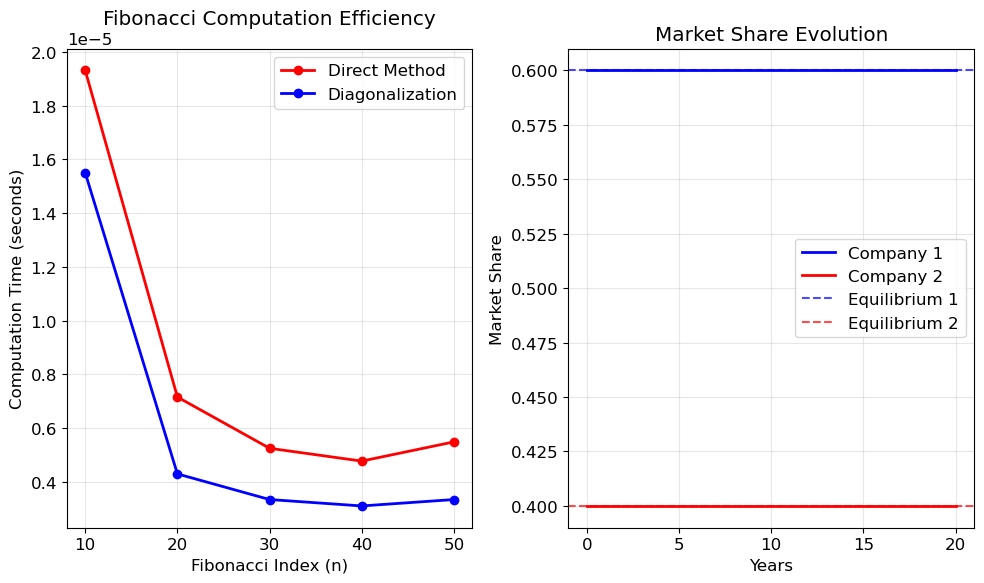


🎉 Congratulations! You've mastered eigenbasis transformations!
You can now:
• Diagonalize matrices to simplify computations
• Analyze long-term behavior of dynamical systems
• Understand the geometric meaning of eigenspaces
• Apply these concepts to real-world problems


In [8]:
# Exercise Solutions
print("📚 Practice Exercise Solutions")
print("="*40)

# Exercise 1: Market Share Dynamics
print("\n🏢 Exercise 1: Market Share Dynamics")
print("-" * 40)

M = np.array([[0.8, 0.3],
              [0.2, 0.7]])

eigenvals_market, eigenvecs_market = np.linalg.eig(M)
print(f"Eigenvalues: {eigenvals_market}")
print("Eigenvectors:")
print(eigenvecs_market)

# Initial market share
initial_share = np.array([0.6, 0.4])
print(f"\nInitial market share: {initial_share}")

# After 10 years using diagonalization
C_market = eigenvecs_market
C_inv_market = np.linalg.inv(C_market)
D_10 = np.diag(eigenvals_market ** 10)
M_10 = C_market @ D_10 @ C_inv_market
share_10_years = M_10 @ initial_share

print(f"Market share after 10 years: {share_10_years}")

# Long-term equilibrium (eigenvector for eigenvalue 1)
equilibrium_idx = np.argmin(np.abs(eigenvals_market - 1))
equilibrium = eigenvecs_market[:, equilibrium_idx]
equilibrium = equilibrium / np.sum(equilibrium)  # Normalize
print(f"Long-term equilibrium: {equilibrium}")

# Exercise 2: Fibonacci with Eigenvalues
print("\n🌀 Exercise 2: Fibonacci Sequence")
print("-" * 40)

F = np.array([[1, 1],
              [1, 0]])

eigenvals_fib, eigenvecs_fib = np.linalg.eig(F)
print(f"Fibonacci matrix eigenvalues: {eigenvals_fib}")

# Golden ratio check
golden_ratio = (1 + np.sqrt(5)) / 2
print(f"Golden ratio φ = {golden_ratio:.6f}")
print(f"Larger eigenvalue = {eigenvals_fib[0]:.6f}")
print(f"Is one eigenvalue the golden ratio? {np.isclose(eigenvals_fib[0], golden_ratio)}")

# Compute F_50 using diagonalization
C_fib = eigenvecs_fib
C_inv_fib = np.linalg.inv(C_fib)
D_50 = np.diag(eigenvals_fib ** 50)
F_50 = C_fib @ D_50 @ C_inv_fib

initial_fib = np.array([1, 1])  # F_1, F_0
fib_50_result = F_50 @ initial_fib
print(f"F_50 = {int(np.round(fib_50_result[1]))}")

# Exercise 3: 3D Rotation (demonstration with complex eigenvalues)
print("\n🔄 Exercise 3: 3D Rotation Matrix")
print("-" * 40)

theta = np.pi/4  # 45 degrees
R_z = np.array([[np.cos(theta), -np.sin(theta), 0],
                [np.sin(theta),  np.cos(theta), 0],
                [0,              0,             1]])

eigenvals_rot, eigenvecs_rot = np.linalg.eig(R_z)
print("3D Rotation eigenvalues:")
for i, val in enumerate(eigenvals_rot):
    print(f"  λ{i+1} = {val}")

print("\nReal parts of eigenvalues:", np.real(eigenvals_rot))
print("Imaginary parts of eigenvalues:", np.imag(eigenvals_rot))

print("\n💡 Insights:")
print("• One real eigenvalue (1.0) corresponds to the rotation axis")
print("• Two complex conjugate eigenvalues represent the rotation in the xy-plane")
print("• Complex eigenvalues indicate that real diagonalization is not possible")
print("• The eigenvector for λ=1 is the z-axis [0, 0, 1]")

# Verify the z-axis eigenvector
z_axis = np.array([0, 0, 1])
Rz_times_z = R_z @ z_axis
print(f"\nR_z * [0,0,1] = {Rz_times_z}")
print(f"Is z-axis an eigenvector? {np.allclose(Rz_times_z, z_axis)}")

# Create a nice visualization comparing direct vs diagonalization efficiency
plt.figure(figsize=(10, 6))

# Fibonacci efficiency comparison
fib_powers = [10, 20, 30, 40, 50]
fib_times_direct = []
fib_times_diag = []

for n in fib_powers:
    # Direct method
    start = time.time()
    F_n_direct = np.linalg.matrix_power(F, n)
    time_direct = time.time() - start
    fib_times_direct.append(time_direct)
    
    # Diagonalization method
    start = time.time()
    D_n = np.diag(eigenvals_fib ** n)
    F_n_diag = C_fib @ D_n @ C_inv_fib
    time_diag = time.time() - start
    fib_times_diag.append(time_diag)

plt.subplot(1, 2, 1)
plt.plot(fib_powers, fib_times_direct, 'ro-', label='Direct Method', linewidth=2)
plt.plot(fib_powers, fib_times_diag, 'bo-', label='Diagonalization', linewidth=2)
plt.xlabel('Fibonacci Index (n)')
plt.ylabel('Computation Time (seconds)')
plt.title('Fibonacci Computation Efficiency')
plt.legend()
plt.grid(True, alpha=0.3)

# Market share evolution
plt.subplot(1, 2, 2)
years = np.arange(0, 21)
company1_share = []
company2_share = []

for year in years:
    if year == 0:
        shares = initial_share
    else:
        D_year = np.diag(eigenvals_market ** year)
        M_year = C_market @ D_year @ C_inv_market
        shares = M_year @ initial_share
    company1_share.append(shares[0])
    company2_share.append(shares[1])

plt.plot(years, company1_share, 'b-', linewidth=2, label='Company 1')
plt.plot(years, company2_share, 'r-', linewidth=2, label='Company 2')
plt.axhline(y=equilibrium[0], color='b', linestyle='--', alpha=0.7, label='Equilibrium 1')
plt.axhline(y=equilibrium[1], color='r', linestyle='--', alpha=0.7, label='Equilibrium 2')
plt.xlabel('Years')
plt.ylabel('Market Share')
plt.title('Market Share Evolution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎉 Congratulations! You've mastered eigenbasis transformations!")
print("You can now:")
print("• Diagonalize matrices to simplify computations")
print("• Analyze long-term behavior of dynamical systems") 
print("• Understand the geometric meaning of eigenspaces")
print("• Apply these concepts to real-world problems")